<a href="https://colab.research.google.com/github/SJzamula/AI_Technology/blob/lab2/Zamula_Liubov_IP_04_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import heapq

Class wich creates graph road and delete random edges.

This class is responsible for generating and representing a road network as a graph.
It is initialized with the size of the graph (grid) and generates the graph using NetworkX's grid_2d_graph function.

It also provides methods to remove random edges from the graph and to display the graph, with the option to highlight a specific path.

<ipython-input-11-e7e93e7242b9>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(self.G.edges, num_edges_to_remove)


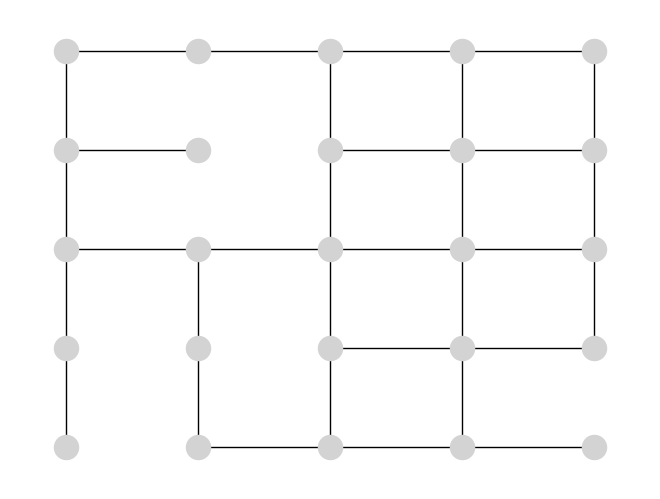

In [11]:
class RoadGraph:
    def __init__(self, size):
        self.size = size
        self.G = self.generate_graph()

    def generate_graph(self):
      G = nx.grid_2d_graph(self.size, self.size)
      return G

    def remove_random_edges(self, num_edges_to_remove):
      edges_to_remove = random.sample(self.G.edges, num_edges_to_remove)
      self.G.remove_edges_from(edges_to_remove)

    def display_graph(self, path=None):
      pos = {(x, y): (y, -x) for x, y in self.G.nodes}
      if path:
        nx.draw(self.G, pos, with_labels=False, node_size=300, node_color='lightgray')
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(self.G, pos, edgelist=path_edges, edge_color='blue', width=2)
        nx.draw_networkx_nodes(self.G, pos, nodelist=path, node_color='blue', node_size=300)

        nx.draw_networkx_nodes(self.G, pos, nodelist=[path[0]], node_color='green', node_size=300)
        nx.draw_networkx_nodes(self.G, pos, nodelist=[path[-1]], node_color='red', node_size=300)

      else:
        nx.draw(self.G, pos, with_labels=False, node_size=300, node_color='lightgray')


      plt.axis('off')
      plt.show()


road = RoadGraph(5)
road.remove_random_edges(7)

road.display_graph()

This class represents a car agent that needs to find a path from a starting point to a goal point on the road network.
It is initialized with the road graph, start and goal points, and initializes various data structures for pathfinding.

The class contains methods for heuristic calculation, getting neighboring nodes, reconstructing the path, and finding the route using the A* algorithm.
The A* algorithm uses a priority queue (open_set) and maintains g_score and f_score values for nodes, along with a came_from dictionary to reconstruct the path.

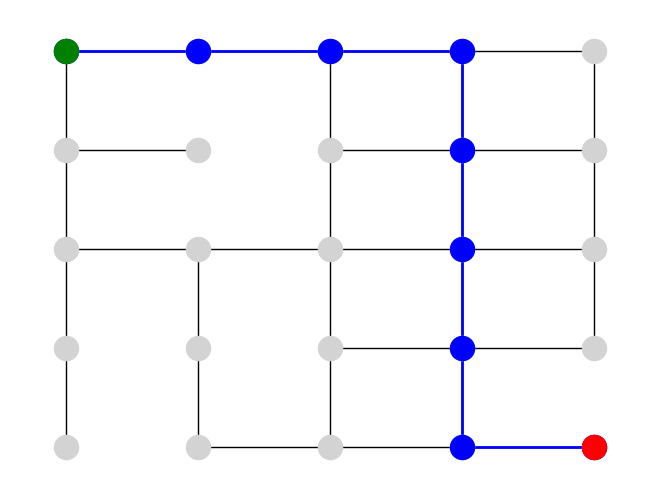

In [13]:
class CarAgent:
  def __init__(self, road, start, goal):
    self.road = road
    self.start = start
    self.goal = goal
    self.visited = set()
    self.route = []
    self.came_from = {}

  def heuristic(self, a, b):
    (x1, y1) = a
    (x2, y2) = b
    return abs(x1 - x2) + abs(y1 - y2)

  def get_neighbors(self, node):
    return list(self.road.G.neighbors(node))

  def reconstruct_path(self, current):
    total_path = [current]
    while current in self.came_from:
      current = self.came_from[current]
      total_path.append(current)
    total_path.reverse()  # Optional: reverse the path to start->goal
    return total_path

  def find_route(self):
    open_set = []
    heapq.heappush(open_set, (0, self.start))  # Priority queue

    g_score = {node: float('inf') for node in self.road.G.nodes()}
    g_score[self.start] = 0

    f_score = {node: float('inf') for node in self.road.G.nodes()}
    f_score[self.start] = self.heuristic(self.start, self.goal)

    while open_set:
      current = heapq.heappop(open_set)[1]  # Get node with lowest f_score

      if current == self.goal:
        self.route = self.reconstruct_path(current)
        return self.route  # Stop when the goal is reached

      self.visited.add(current)

      for neighbor in self.get_neighbors(current):
        tentative_g_score = g_score[current] + 1  # Assuming all edges have the same weight (1)

        if tentative_g_score < g_score[neighbor]:
          self.came_from[neighbor] = current
          g_score[neighbor] = tentative_g_score
          f_score[neighbor] = tentative_g_score + self.heuristic(neighbor, self.goal)

          if neighbor not in self.visited:
            heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return False  # Return False i

start_point = (0, 0)
goal_point = (4, 4)

agent = CarAgent(road, start_point, goal_point)
agent.find_route()

road.display_graph(agent.route)